<a href="https://colab.research.google.com/github/arfanrifqi/perizinan-rumah-sakit/blob/main/perizinan_Rumah_Sakit_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**import libraries**

In [1]:
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**read dataset**

In [2]:
fa_rs = pd.read_csv('/content/drive/MyDrive/dataset/fasilitas_kesehatan.csv', index_col='kode_rs')

print(fa_rs.info())
print(fa_rs.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 3326 entries, 3578789 to kode_rs
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nama              3325 non-null   object
 1   jenis             3206 non-null   object
 2   kelas             3270 non-null   object
 3   jml_dokter        3326 non-null   object
 4   jml_perawat       3326 non-null   object
 5   jml_bidan         3326 non-null   object
 6   jml_tenaga_medis  3326 non-null   object
 7   spa               3326 non-null   object
 8   spog              3326 non-null   object
 9   spd               3326 non-null   object
 10  spb               3326 non-null   object
 11  sprad             3326 non-null   object
 12  sprm              3326 non-null   object
 13  span              3326 non-null   object
 14  spjp              3326 non-null   object
 15  spm               3326 non-null   object
 16  sptht             3326 non-null   object
 17  spkj      

In [3]:
fa_rs.head()

,nama,jenis,kelas,jml_dokter,jml_perawat,jml_bidan,jml_tenaga_medis,spa,spog,spd,spb,sprad,sprm,span,spjp,spm,sptht,spkj,sppk,sps,spp,spokupasi,spu,spkl,sporthopedi,spf,sppsikiatri,spof,sppa,vvip,vip,kelas_1,kelas_2,kelas_3,icu,picu,nicu,hcu,igd,bayi,bersalin,operasi,isolasi
kode_rs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3578789,RS Ibu dan Anak Kendangsari Surabaya,RSIA,C,13,33,0,3,5,8,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4,7,6,8,0,NaN,4,NaN,NaN,0,NaN,NaN,NaN
3578786,RS Mata Masyarakat Jawa Timur,RSK Mata,B,11,51,0,3,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,12,8,24,0,NaN,0,NaN,NaN,0,NaN,NaN,NaN
3578791,RS Ibu dan Anak Graha Medika,RSIA,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,NaN
3578793,RS PKU Muhammadiyah Surabaya,RSU,D,12,34,0,2,2,3,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,2,6,33,0,NaN,4,NaN,NaN,18,NaN,NaN,NaN
3578794,RS Ibu dan Anak Pusura Tegalsari,RSIA,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,0,NaN,NaN,NaN


In [4]:
fa_rs.columns

Index(['nama', 'jenis', 'kelas', 'jml_dokter', 'jml_perawat', 'jml_bidan',
       'jml_tenaga_medis', 'spa', 'spog', 'spd', 'spb', 'sprad', 'sprm',
       'span', 'spjp', 'spm', 'sptht', 'spkj', 'sppk', 'sps', 'spp',
       'spokupasi', 'spu', 'spkl', 'sporthopedi', 'spf', 'sppsikiatri', 'spof',
       'sppa', 'vvip', 'vip', 'kelas_1', 'kelas_2', 'kelas_3', 'icu', 'picu',
       'nicu', 'hcu', 'igd', 'bayi', 'bersalin', 'operasi', 'isolasi'],
      dtype='object')

In [5]:
fa_rs.drop(['kode_rs'], inplace=True)

In [6]:
df_rs_num = ['jml_dokter', 'jml_perawat','jml_bidan', 
            'jml_tenaga_medis','spa', 'spog', 'spd', 'spb', 'sprad', 'sprm',
            'span', 'spjp', 'spm', 'sptht', 'spkj', 'sppk', 'sps', 'spp',
            'spokupasi', 'spu', 'spkl', 'sporthopedi', 'spf', 'sppsikiatri', 'spof',
            'sppa','vvip', 'vip', 'kelas_1', 
            'kelas_2', 'kelas_3', 'icu', 'picu',
            'nicu', 'hcu', 'igd', 'bayi', 
            'bersalin', 'operasi', 'isolasi']

fa_rs[df_rs_num] = fa_rs[df_rs_num].apply(pd.to_numeric, errors='coerce', axis=1)
print(fa_rs.dtypes)

nama                 object
jenis                object
kelas                object
jml_dokter          float64
jml_perawat         float64
jml_bidan           float64
jml_tenaga_medis    float64
spa                 float64
spog                float64
spd                 float64
spb                 float64
sprad               float64
sprm                float64
span                float64
spjp                float64
spm                 float64
sptht               float64
spkj                float64
sppk                float64
sps                 float64
spp                 float64
spokupasi           float64
spu                 float64
spkl                float64
sporthopedi         float64
spf                 float64
sppsikiatri         float64
spof                float64
sppa                float64
vvip                float64
vip                 float64
kelas_1             float64
kelas_2             float64
kelas_3             float64
icu                 float64
picu                

In [7]:
fa_rs['nama'].unique()

array(['RS Ibu dan Anak Kendangsari Surabaya',
       'RS Mata Masyarakat Jawa Timur', 'RS Ibu dan Anak Graha Medika',
       ..., 'RSIA AMANNA', 'RS Ibu dan Anak Mutiara Hati',
       'RS Bedah Surabaya'], dtype=object)

In [8]:
fa_rs['kelas'].unique()

array(['C', 'B', 'D', 'Belum ditetapkan', 'A', 'D Pratama',
       'Belum Ditetapkan', nan, 'IV', 'III'], dtype=object)

In [9]:
fa_rs['jenis'].unique()

array(['RSIA', 'RSK Mata', 'RSU', 'RS Bersalin', 'RSK Bedah', 'RS Jiwa',
       'RSTP', 'RS Kusta', 'RSK Gigi dan Mulut', 'RS Jiwa/ RSKO',
       'RSK Syaraf', nan, 'RSK', 'RSK Anak', 'RSAB', 'RS', 'RSK P.Dalam',
       'RSK THT', 'RS Jantung ', 'RS Kanker', 'RSK Otak',
       'RS Penyakit Infeksi ', 'RS Jantung', 'RSK Ginjal', 'RS O ',
       'RSK Tuberkolosis dan', 'RS Stroke'], dtype=object)

In [10]:
print(fa_rs.isnull().sum())

nama                   1
jenis                120
kelas                 56
jml_dokter             0
jml_perawat            0
jml_bidan              0
jml_tenaga_medis       0
spa                    0
spog                   0
spd                    0
spb                    0
sprad                  0
sprm                   0
span                   0
spjp                   0
spm                    0
sptht                  0
spkj                   0
sppk                   0
sps                    0
spp                    0
spokupasi              0
spu                    0
spkl                   0
sporthopedi            0
spf                    0
sppsikiatri            0
spof                   0
sppa                   0
vvip                 229
vip                  229
kelas_1              229
kelas_2              229
kelas_3              229
icu                  229
picu                3292
nicu                 229
hcu                 3292
igd                 3325
bayi                 229


In [11]:
df_rs_cat = ['nama','jenis', 'kelas']
df_rs_num =['jml_dokter', 'jml_perawat','jml_bidan', 
            'jml_tenaga_medis','spa', 'spog', 'spd', 'spb', 'sprad', 'sprm',
            'span', 'spjp', 'spm', 'sptht', 'spkj', 'sppk', 'sps', 'spp',
            'spokupasi', 'spu', 'spkl', 'sporthopedi', 'spf', 'sppsikiatri', 'spof',
            'sppa','vvip', 'vip', 'kelas_1', 
            'kelas_2', 'kelas_3', 'icu', 'picu',
            'nicu', 'hcu', 'igd', 'bayi', 
            'bersalin', 'operasi', 'isolasi']

In [12]:
fa_rs[df_rs_num].describe()

,jml_dokter,jml_perawat,jml_bidan,jml_tenaga_medis,spa,spog,spd,spb,sprad,sprm,span,spjp,spm,sptht,spkj,sppk,sps,spp,spokupasi,spu,spkl,sporthopedi,spf,sppsikiatri,spof,sppa,vvip,vip,kelas_1,kelas_2,kelas_3,icu,picu,nicu,hcu,igd,bayi,bersalin,operasi,isolasi
count,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.0,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,33.000000,3096.000000,33.000000,0.0,3096.000000,33.000000,33.000000,33.000000
mean,13.384962,75.451729,7.743158,3.970226,2.132632,2.486015,2.068271,1.562406,0.929323,0.929323,1.490226,0.572030,0.981654,0.889323,0.389474,0.600301,0.940752,0.564211,0.008722,0.295338,0.0,0.517895,0.067068,0.111278,0.035188,0.257444,2.827519,8.726098,14.907300,19.642442,41.133721,2.619509,4.848485,1.380814,20.030303,NaN,8.182817,8.060606,6.545455,7.757576
std,13.321414,133.751210,17.259493,6.285287,3.096547,3.240491,3.003883,1.955453,1.280981,1.280981,1.942691,1.569489,2.128674,1.642295,1.101174,0.922672,1.576692,1.102391,0.099256,0.741169,0.0,1.050498,0.371213,0.611470,0.425172,0.748369,7.353653,14.061965,19.115873,23.902151,55.797281,4.436294,7.984834,3.567671,32.589765,NaN,8.983822,16.163113,7.168032,9.829898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,6.000000,12.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
50%,11.000000,29.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,12.000000,26.000000,0.000000,0.000000,0.000000,5.000000,NaN,6.000000,2.000000,4.000000,4.000000
75%,18.000000,94.000000,9.000000,5.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,10.000000,20.000000,26.000000,48.250000,4.000000,8.000000,1.000000,18.000000,NaN,12.000000,12.000000,12.000000,13.000000
max,138.000000,2006.000000,256.000000,109.000000,57.000000,47.000000,58.000000,31.000000,16.000000,16.000000,26.000000,45.000000,39.000000,39.000000,24.000000,15.000000,25.000000,26.000000,2.000000,8.000000,0.0,13.000000,8.000000,14.000000,12.000000,14.000000,111.000000,226.000000,223.000000,476.000000,756.000000,96.000000,40.000000,56.000000,120.000000,NaN,106.000000,88.000000,22.000000,36.000000


In [13]:
fa_rs[df_rs_cat].describe()

,nama,jenis,kelas
count,3324,3205,3269
unique,3075,26,9
top,RS Ibu dan Anak Mutiara Bunda,RSU,C
freq,6,2520,1563


In [14]:
fa_rs.duplicated().sum()

170

In [15]:
fa_rs.drop_duplicates()
fa_rs = fa_rs.sort_values('kode_rs',ascending=False).drop_duplicates(['nama'])
print('hasil nama rumah sakit yang diuplikat setelah dihilangkan', fa_rs['nama'].count())
print('duplikcat', fa_rs['nama'].duplicated().sum())

hasil nama rumah sakit yang diuplikat setelah dihilangkan 3075
duplikcat 0


In [16]:
fa_rs = fa_rs.replace(['Belum Ditetapkan'],['Belum ditetapkan'])

fa_rs['kelas'].unique()

array(['C', 'B', 'Belum ditetapkan', 'D', 'D Pratama', nan, 'A', 'III',
       'IV'], dtype=object)

In [17]:
fa_rs['kelas'].isna().sum()

56

In [18]:
fa_rs.dropna(subset = ["kelas"], inplace=True)

#**Exploratory Data Analyst**

In [19]:
for col in df_rs_cat:
  print(f'''value count kolom {col} :''')
  print(fa_rs[col].value_counts())
  print()

value count kolom nama :
RS Provita Jayapura                                   1
Rumah Sakit Universitas Indonesia                     1
RS Umum Bhakti Medicare                               1
 RS Umum Betha Medika                                 1
 RS Umum Hermina                                      1
                                                     ..
RS Ibu dan Anak Mukti Husada                          1
RS Umum Asyifa Husada Pamekasan                       1
RS Umum Larasati Pamekasan                            1
RS Umum Daerah Dr. H. Slamet Martodirdjo Pamekasan    1
 RS Umum Daerah Aceh Singkil                          1
Name: nama, Length: 3020, dtype: int64

value count kolom jenis :
RSU                     2348
RSIA                     341
RS Bersalin               44
RSK Bedah                 40
RS Jiwa/ RSKO             34
RSK Mata                  33
RSK Gigi dan Mulut        26
RSAB                      17
RS Jiwa                   13
RSTP                      11
RS 

In [20]:
print('jumlah tenaga kesehatan,tenaga medis dan jumlah fasilitas ruangan:\n')
print(fa_rs.sum(numeric_only=True).astype(int))

jumlah tenaga kesehatan,tenaga medis dan jumlah fasilitas ruangan:

jml_dokter           42115
jml_perawat         243486
jml_bidan            24310
jml_tenaga_medis     12584
spa                   6636
spog                  7657
spd                   6523
spb                   4878
sprad                 2938
sprm                  2938
span                  4650
spjp                  1832
spm                   3111
sptht                 2824
spkj                  1260
sppk                  1912
sps                   2995
spp                   1803
spokupasi               28
spu                    941
spkl                     0
sporthopedi           1632
spf                    221
sppsikiatri            361
spof                   109
sppa                   829
vvip                  8315
vip                  25673
kelas_1              44005
kelas_2              57833
kelas_3             121875
icu                   7857
picu                   160
nicu                  4086
hcu           

##**exploratory with diagram**

In [21]:
fa_rs[df_rs_num]= fa_rs[df_rs_num].fillna(0)
fa_rs[df_rs_num] = fa_rs[df_rs_num].astype(int) 

###**diagram perbandingan kelas**

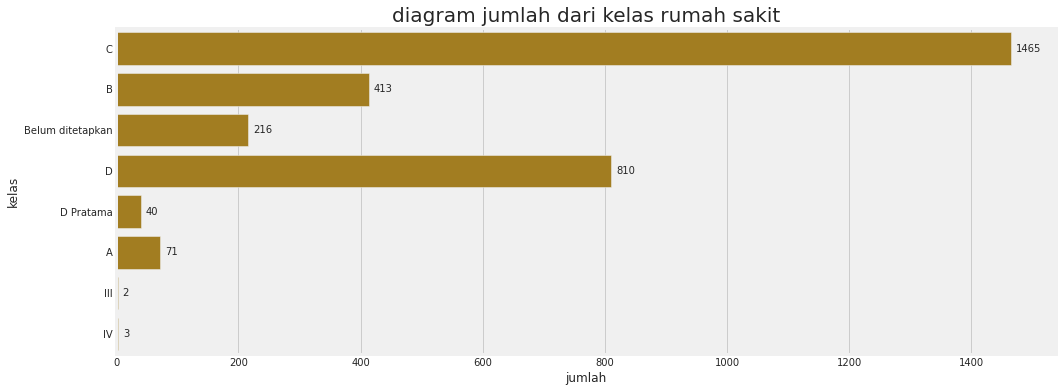

In [22]:
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(y="kelas", data=fa_rs, color="darkgoldenrod")

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram jumlah dari kelas rumah sakit', fontsize=20, loc='center')
plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('jumlah', fontsize=12)
plt.show()

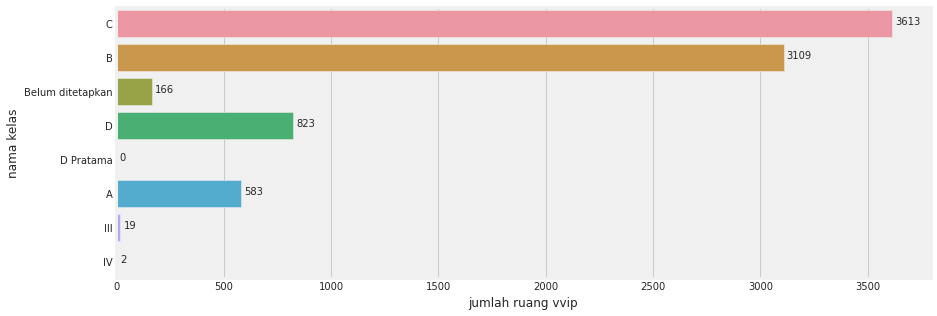

In [23]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['vvip'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah ruang vvip',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

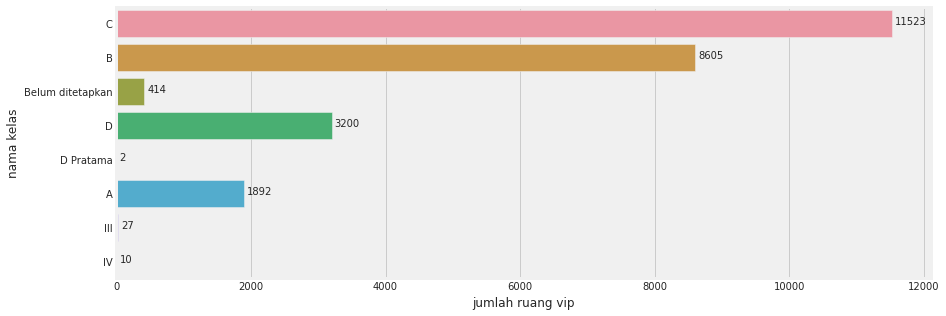

In [24]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['vip'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah ruang vip',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

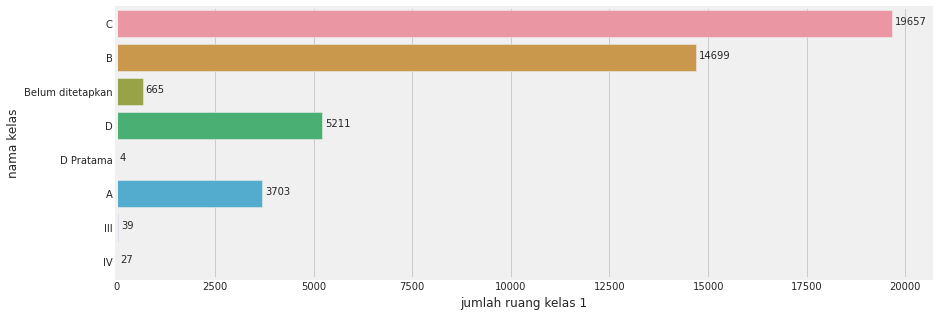

In [25]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['kelas_1'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah ruang kelas 1',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

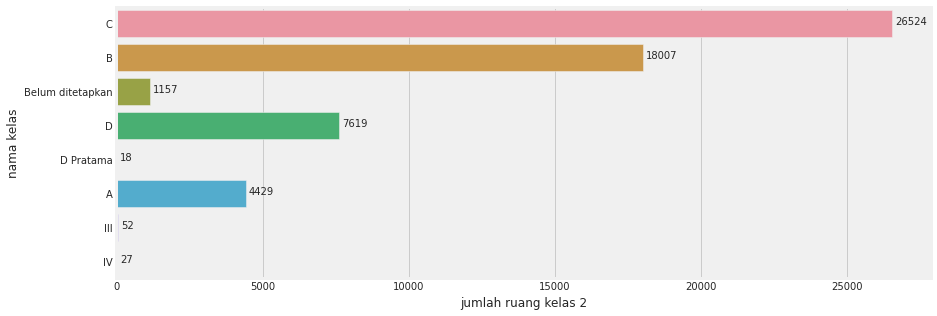

In [26]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['kelas_2'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah ruang kelas 2',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

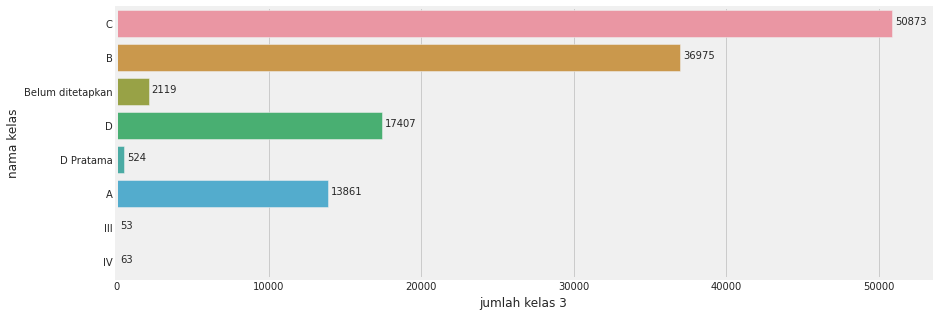

In [27]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['kelas_3'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah kelas 3',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

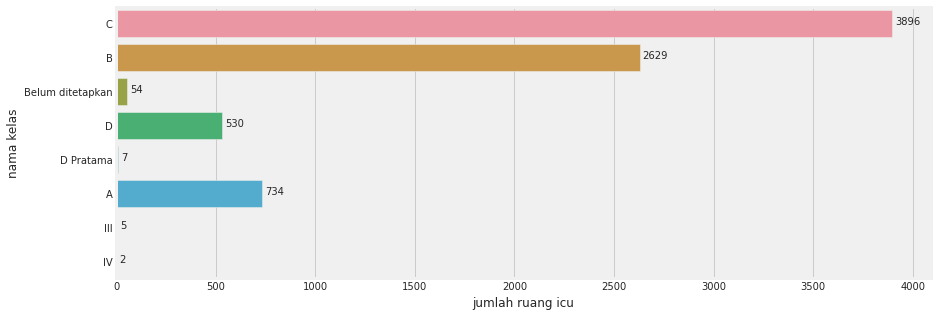

In [28]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['icu'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah ruang icu',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

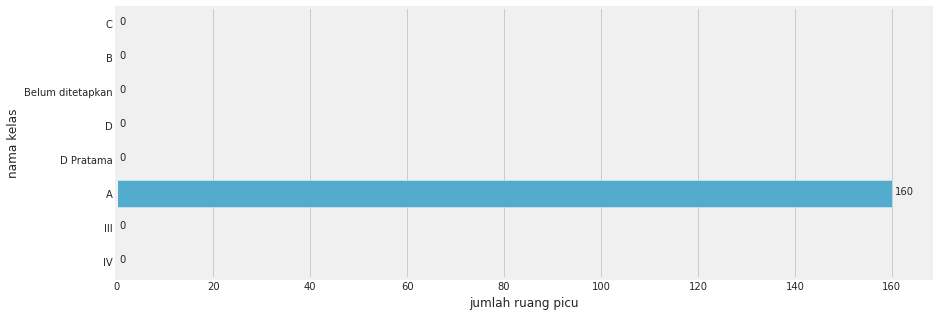

In [29]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['picu'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah ruang picu',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

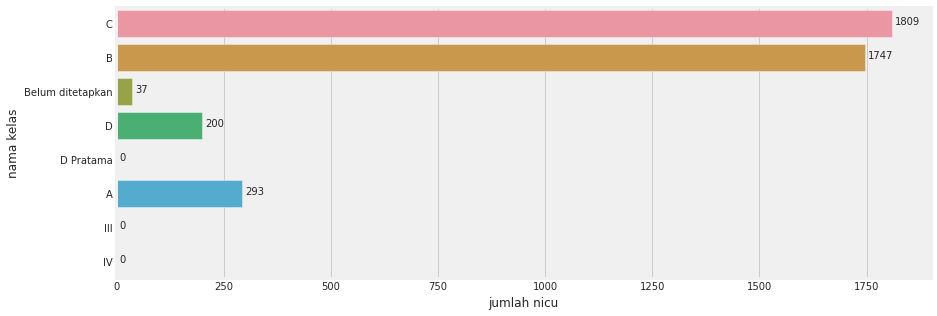

In [30]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['nicu'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah nicu',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

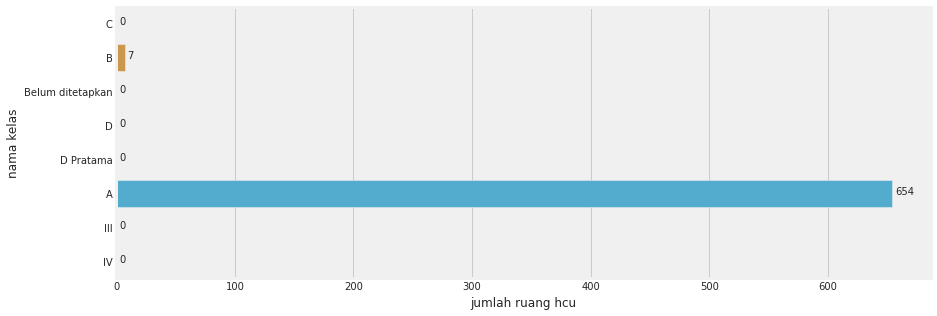

In [31]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['hcu'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah ruang hcu',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

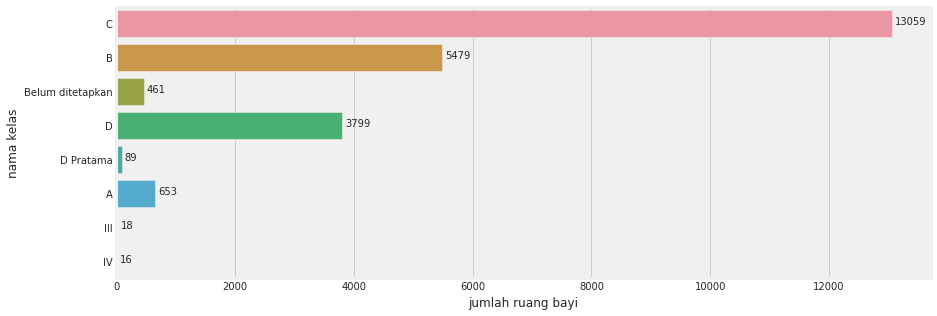

In [32]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['bayi'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah ruang bayi',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

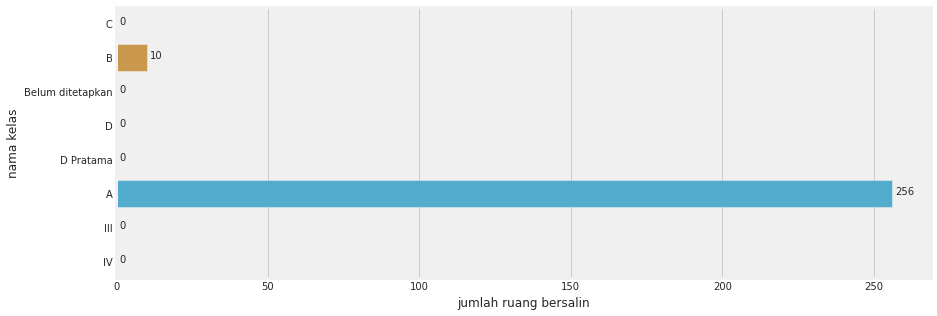

In [33]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['bersalin'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah ruang bersalin',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

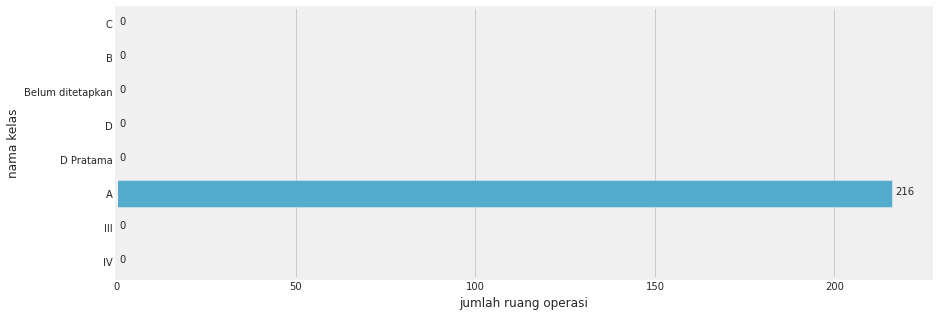

In [34]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['operasi'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah ruang operasi',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

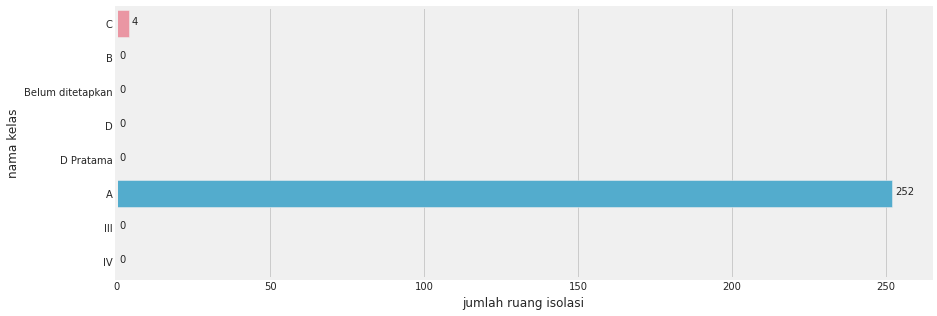

In [35]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['isolasi'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah ruang isolasi',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

###**diagram jenis pada fasilitas rumah sakit**

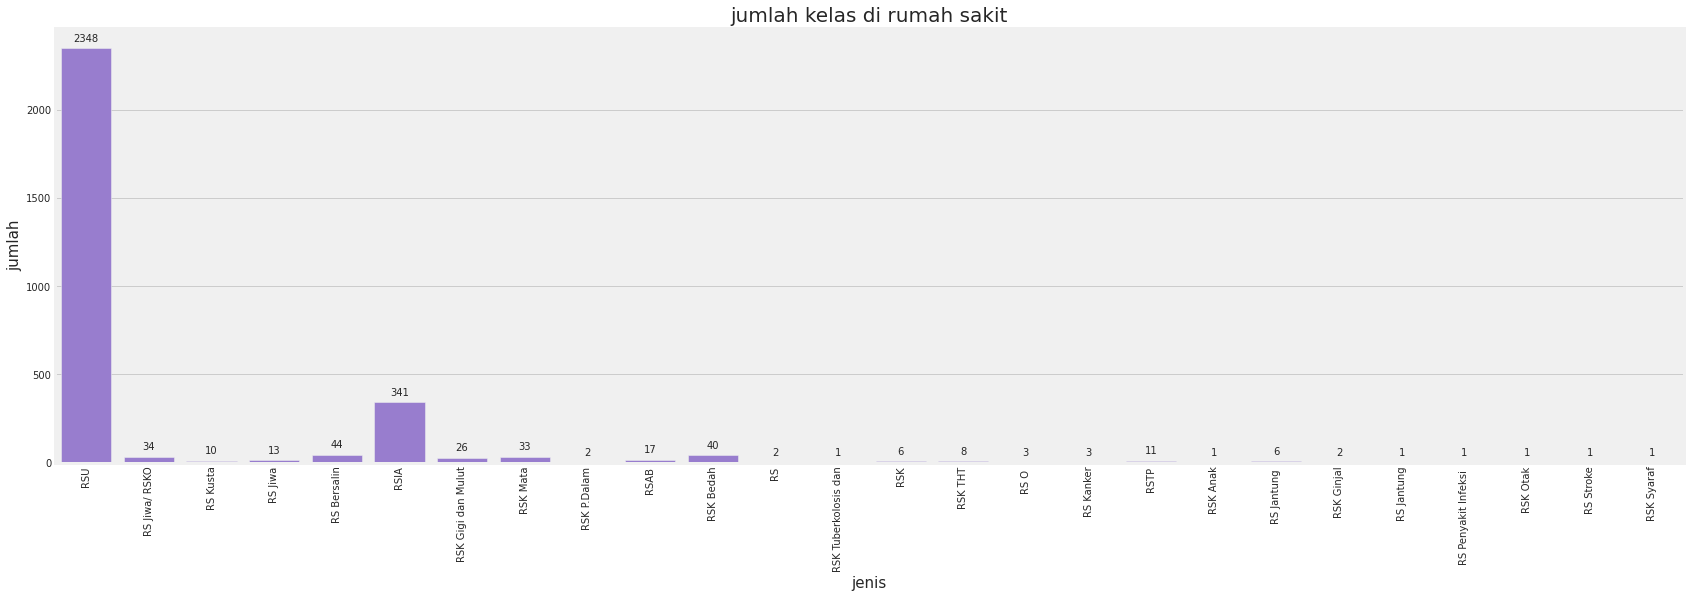

In [36]:
plt.figure(figsize=(26,8))
ax = sns.countplot(x="jenis", data=fa_rs, color='mediumpurple')
plt.title('jumlah kelas di rumah sakit', fontsize=20)

ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
plt.xticks(rotation=90)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points')
plt.ylabel('jumlah', fontsize=15)
plt.xlabel('jenis', fontsize=15)
plt.grid(axis='y', linestyle='-', linewidth=0.5, color='darkgray')
plt.show()

###**diagram perbandingan antara kelas dengan dokter, perawat, bidan, dan tenaga medis**

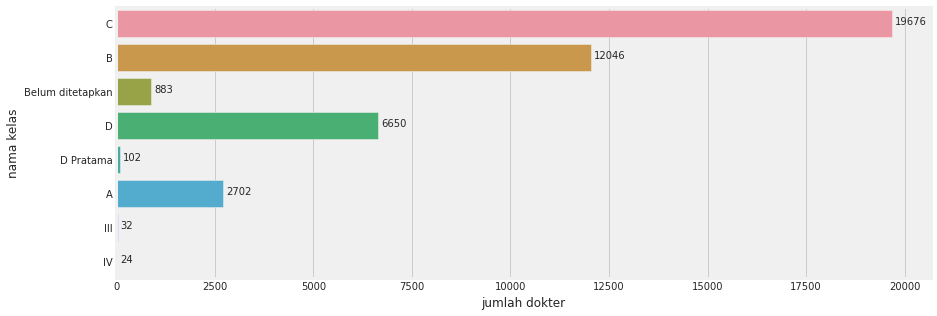

In [37]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['jml_dokter'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah dokter',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

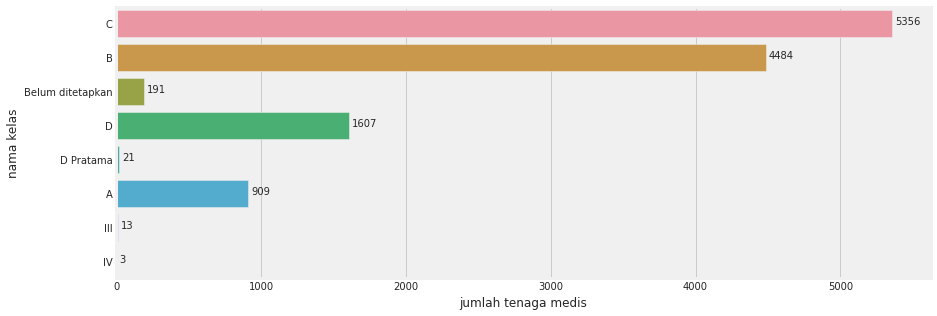

In [38]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['jml_tenaga_medis'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah tenaga medis',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

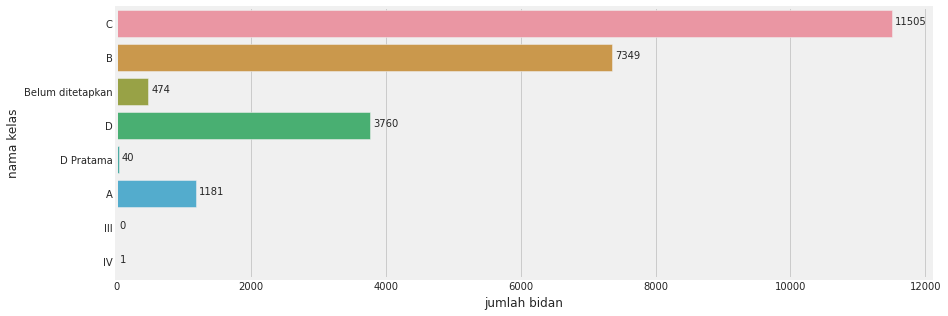

In [39]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['jml_bidan'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
  
plt.xlabel('jumlah bidan',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

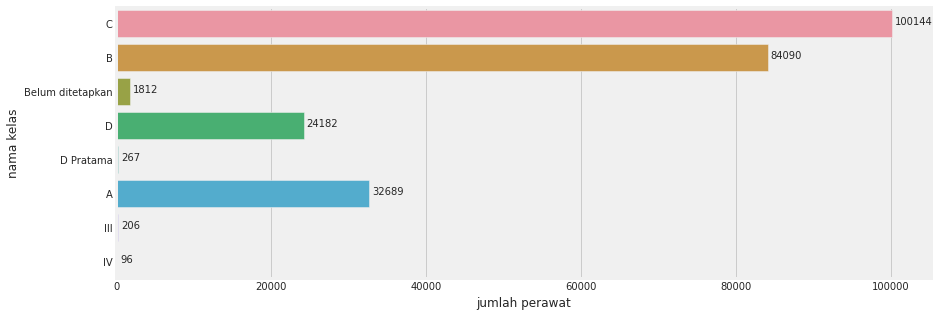

In [40]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['jml_perawat'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
plt.xlabel('jumlah perawat',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

###**10 teratas jumlah dokter di rumah sakit**

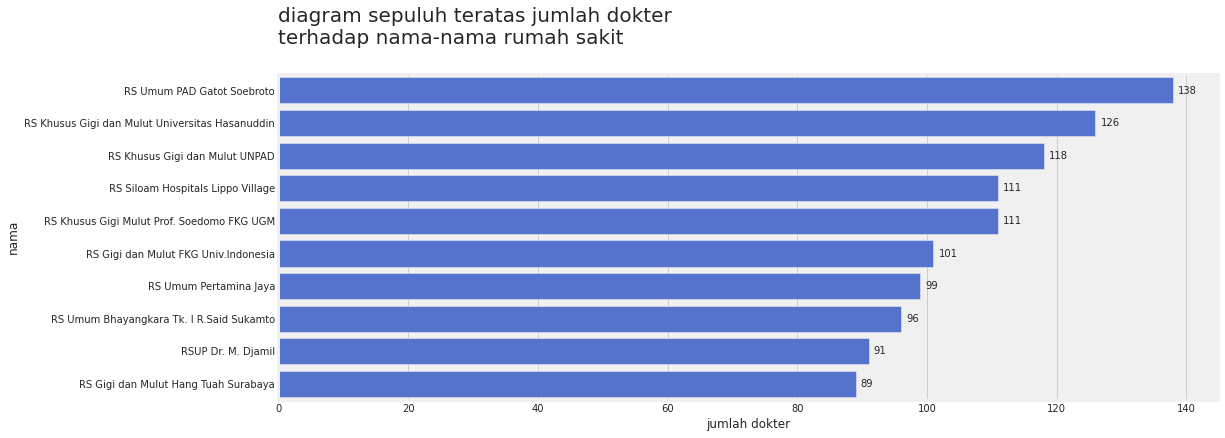

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['jml_dokter'], ascending=False)[:10]

sns.barplot(x='jml_dokter',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah dokter \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah dokter', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

###**10 teratas jumlah tenaga medis**

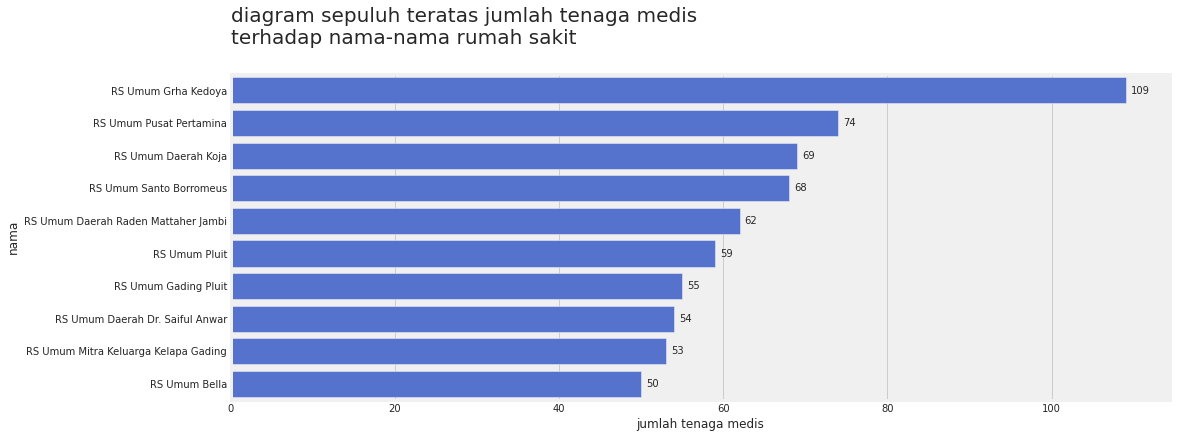

In [42]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['jml_tenaga_medis'], ascending=False)[:10]

sns.barplot(x='jml_tenaga_medis',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah tenaga medis \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah tenaga medis', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

###**10 teratas jumlah perawat**

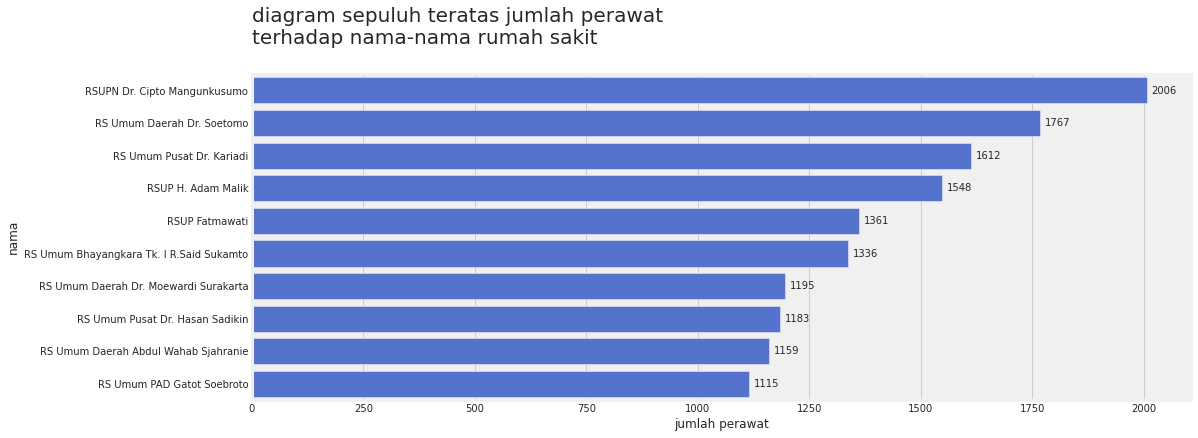

In [43]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['jml_perawat'], ascending=False)[:10]

sns.barplot(x='jml_perawat',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah perawat \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah perawat', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

###**10 teratas jumlah bidan di rumah sakit**

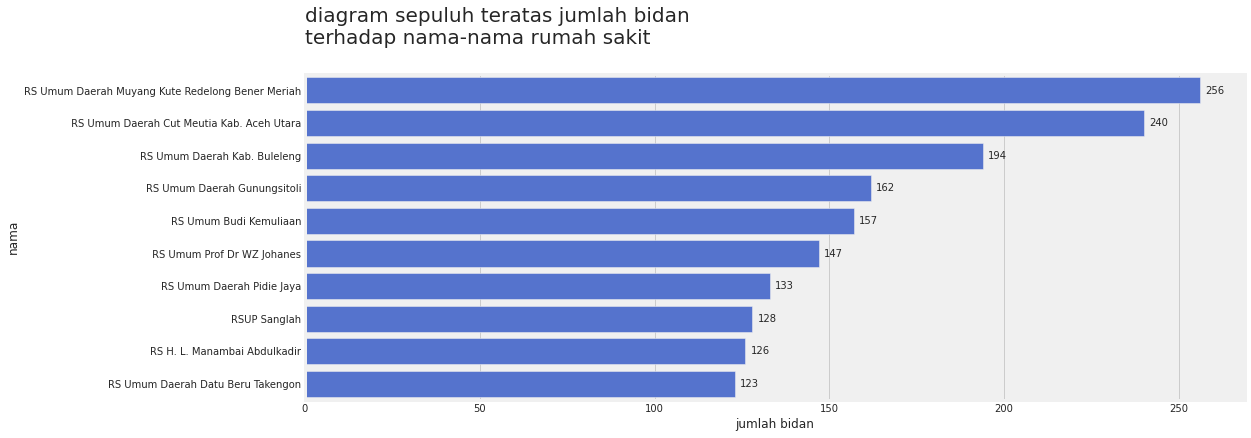

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['jml_bidan'], ascending=False)[:10]

sns.barplot(x='jml_bidan',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah bidan \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah bidan', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

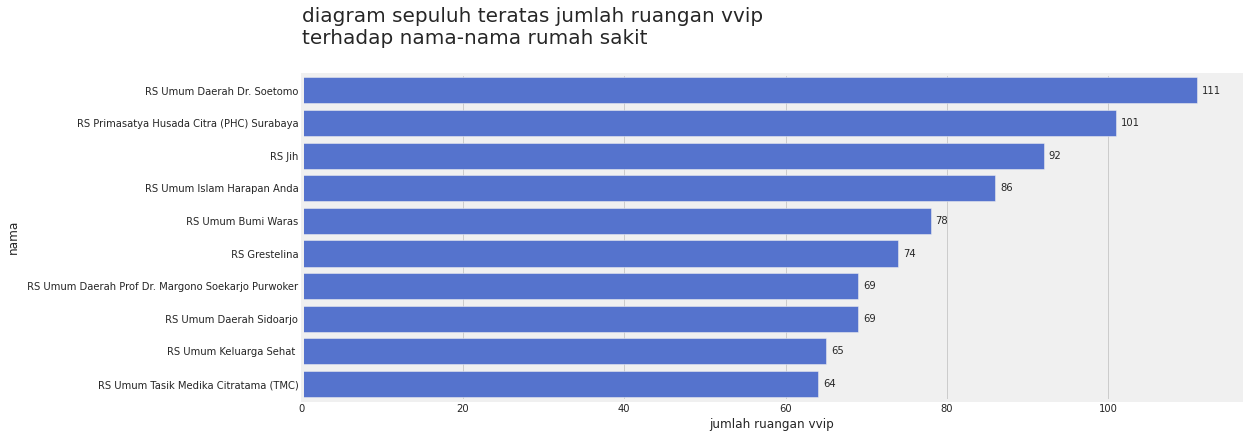

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['vvip'], ascending=False)[:10]

sns.barplot(x='vvip',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan vvip \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan vvip', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

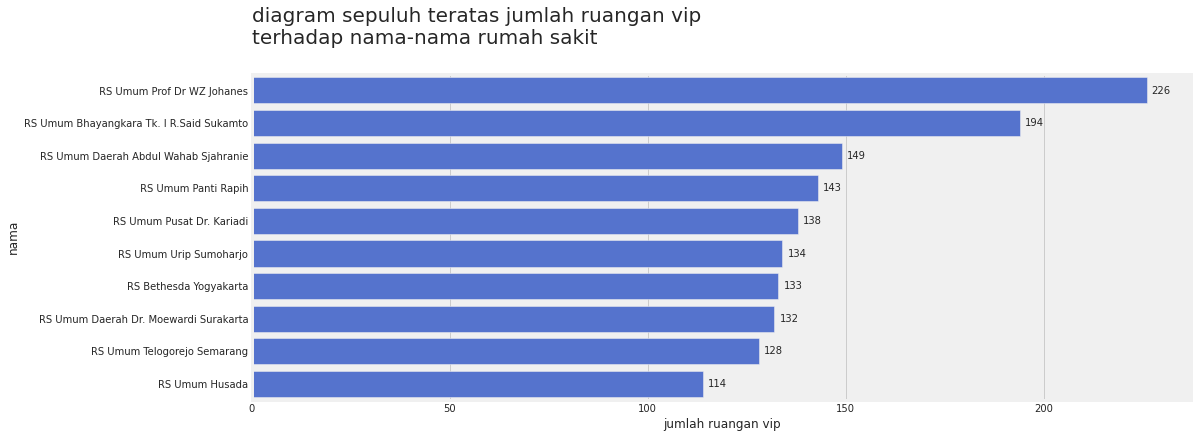

In [46]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['vip'], ascending=False)[:10]

sns.barplot(x='vip',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan vip \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan vip', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

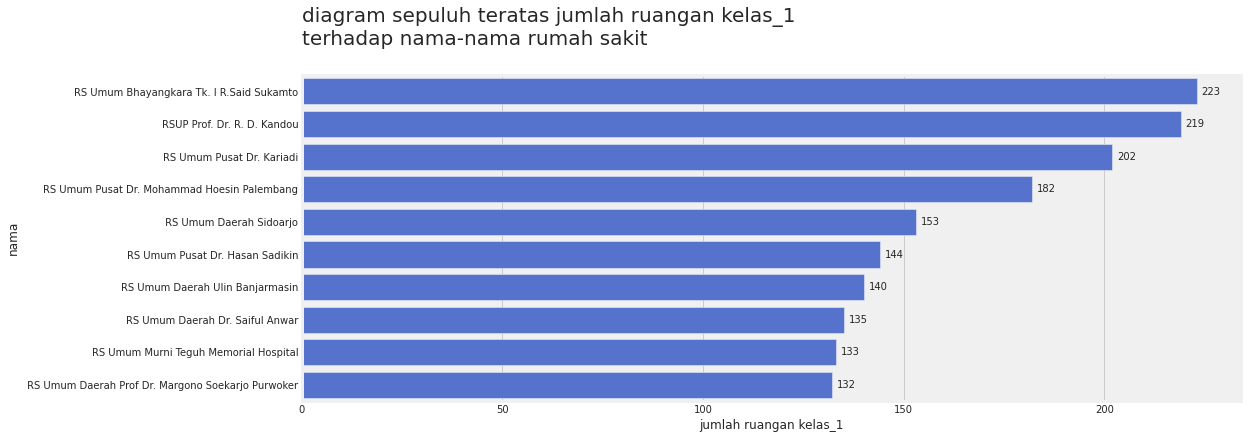

In [47]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['kelas_1'], ascending=False)[:10]

sns.barplot(x='kelas_1',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan kelas_1 \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan kelas_1', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

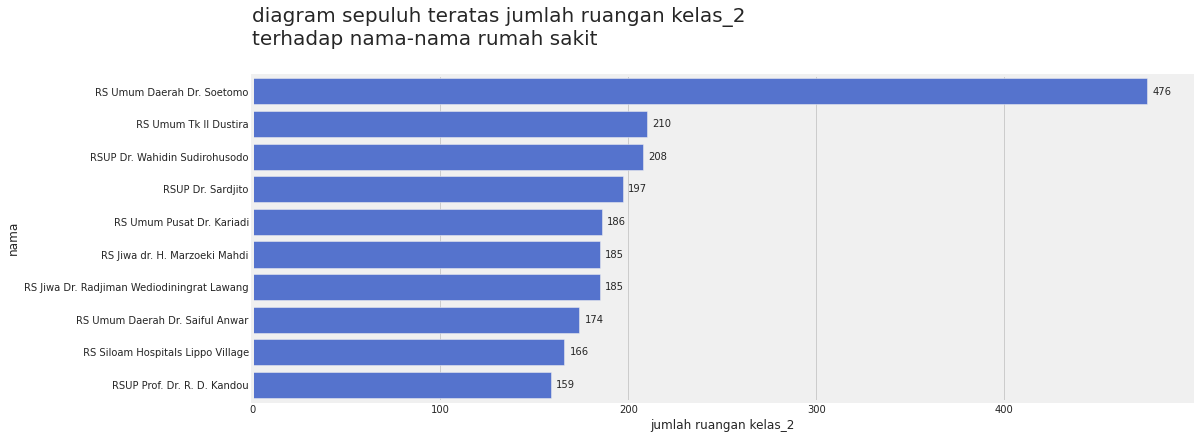

In [48]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['kelas_2'], ascending=False)[:10]

sns.barplot(x='kelas_2',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan kelas_2 \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan kelas_2', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

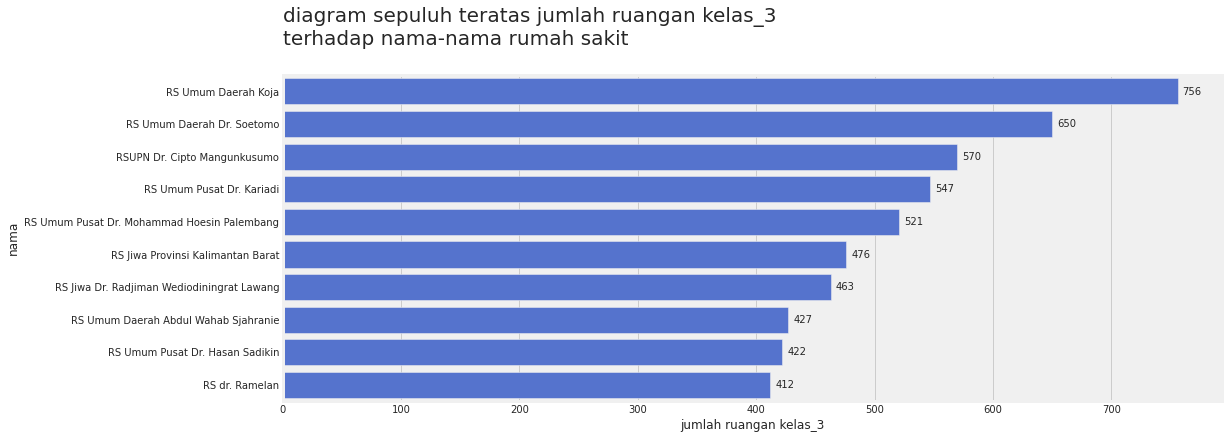

In [49]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['kelas_3'], ascending=False)[:10]

sns.barplot(x='kelas_3',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan kelas_3 \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan kelas_3', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

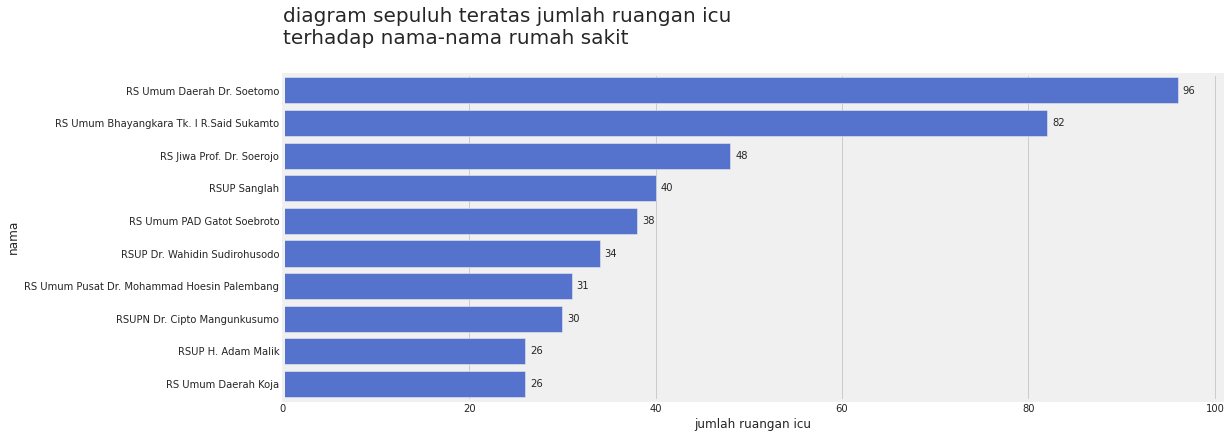

In [50]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['icu'], ascending=False)[:10]

sns.barplot(x='icu',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan icu \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan icu', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

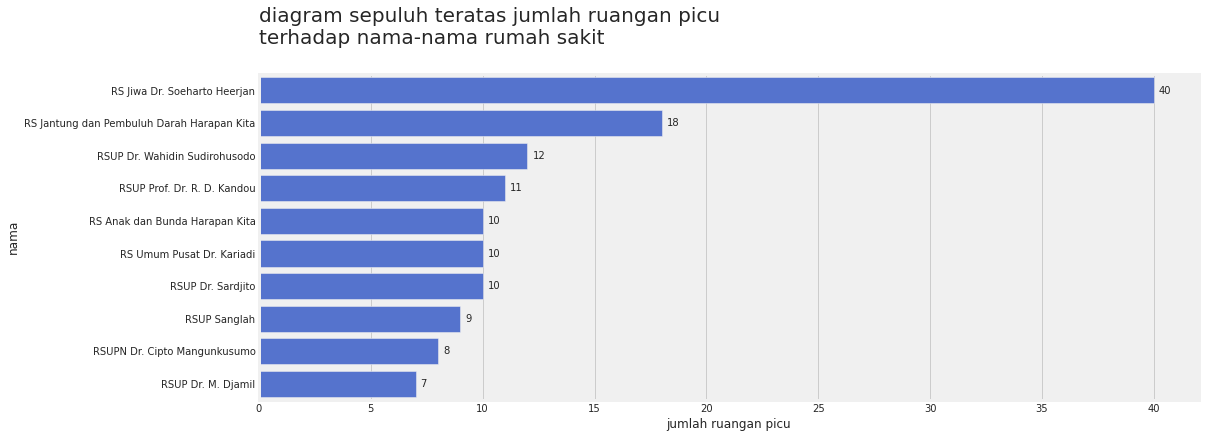

In [51]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['picu'], ascending=False)[:10]

sns.barplot(x='picu',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan picu \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan picu', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

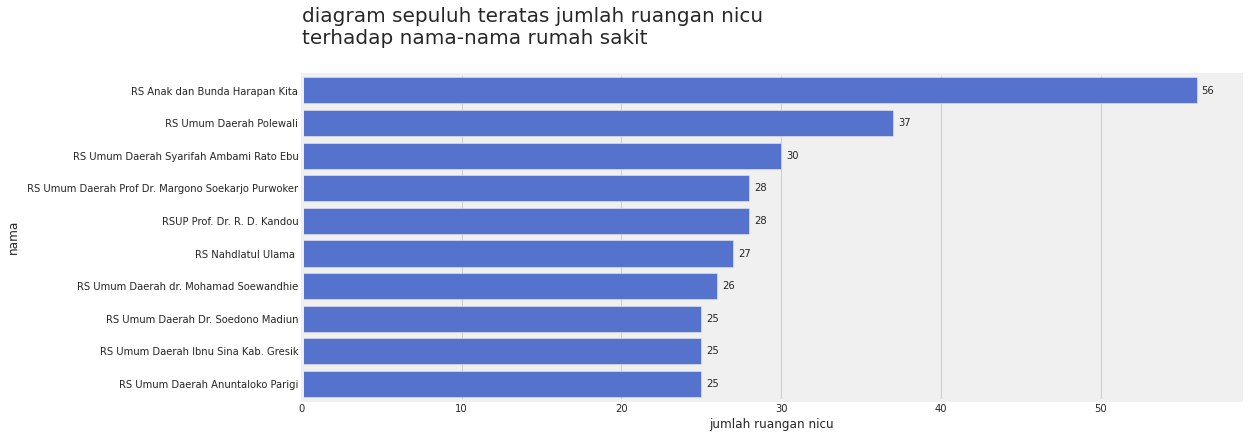

In [52]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['nicu'], ascending=False)[:10]

sns.barplot(x='nicu',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan nicu \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan nicu', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

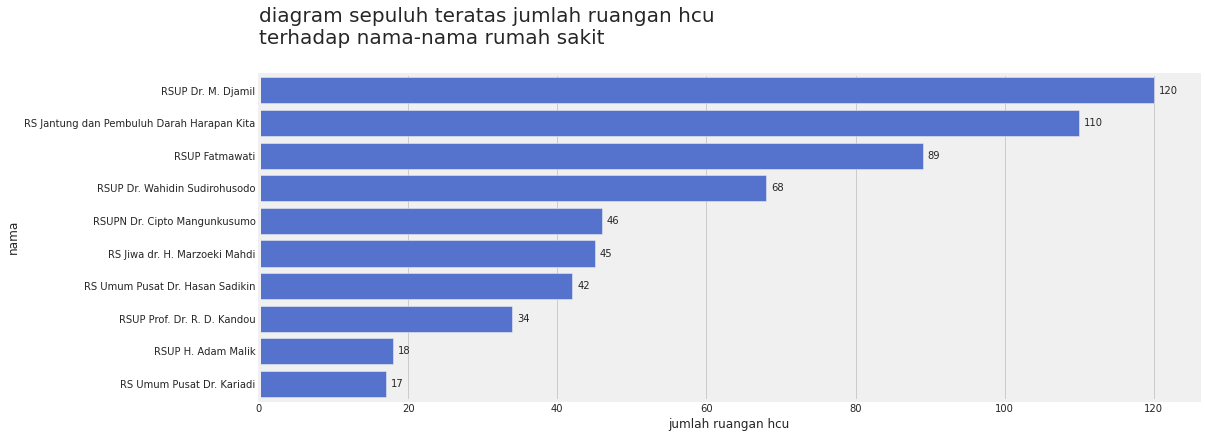

In [53]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['hcu'], ascending=False)[:10]

sns.barplot(x='hcu',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan hcu \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan hcu', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

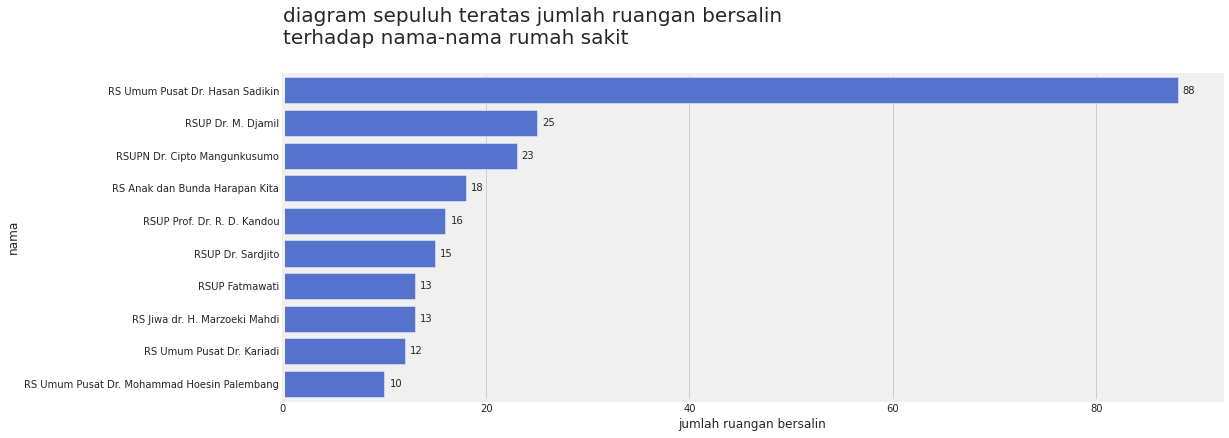

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['bersalin'], ascending=False)[:10]

sns.barplot(x='bersalin',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan bersalin \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan bersalin', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

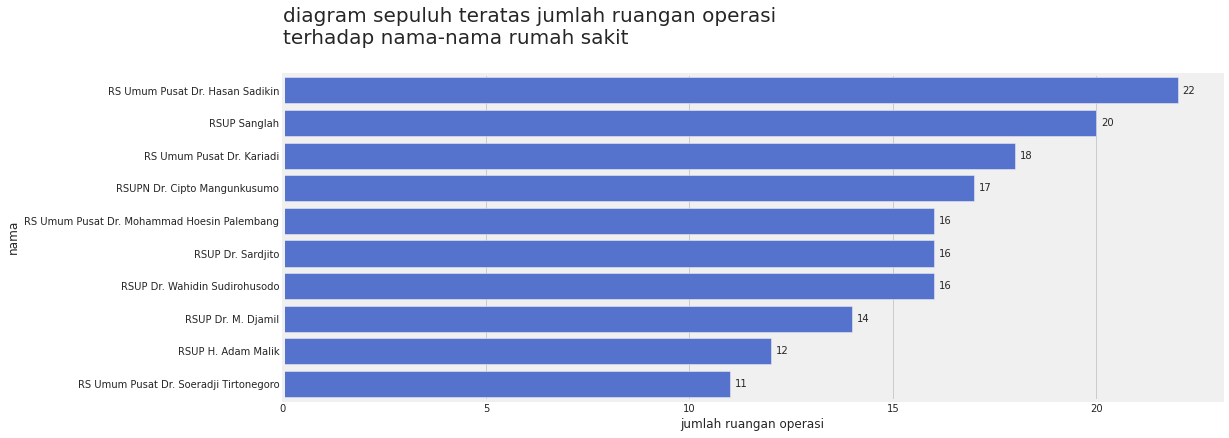

In [55]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['operasi'], ascending=False)[:10]

sns.barplot(x='operasi',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan operasi \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan operasi', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

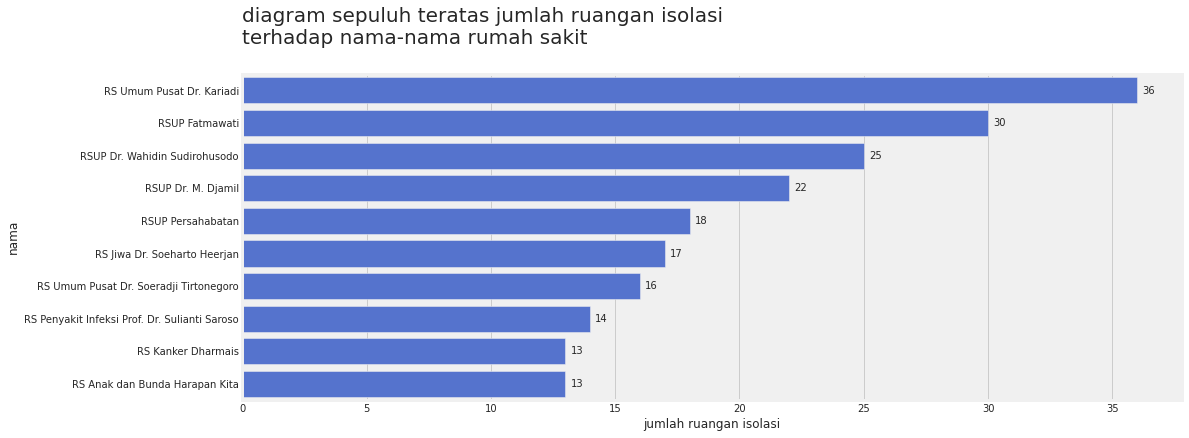

In [56]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['isolasi'], ascending=False)[:10]

sns.barplot(x='isolasi',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas jumlah ruangan isolasi \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('jumlah ruangan isolasi', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

##**feature engineering**

In [57]:
fa_rs['spesialis_dasar'] = fa_rs['spa'] + fa_rs['spog'] + fa_rs['spd']
fa_rs['spesialis_penunjang'] = fa_rs['sprad'] + fa_rs['sprm'] + fa_rs['spb'] + fa_rs['span'] + fa_rs['sppk'] + fa_rs['sppa']
fa_rs['spesialis_lain'] = fa_rs['spjp'] + fa_rs['spm'] + fa_rs['sptht'] + fa_rs['spkj'] + fa_rs['sps'] + fa_rs['spp'] + fa_rs['spu'] + fa_rs['spkl'] + fa_rs['sporthopedi'] + fa_rs['spf']

fa_rs.head()

,nama,jenis,kelas,jml_dokter,jml_perawat,jml_bidan,jml_tenaga_medis,spa,spog,spd,spb,sprad,sprm,span,spjp,spm,sptht,spkj,sppk,sps,spp,spokupasi,spu,spkl,sporthopedi,spf,sppsikiatri,spof,sppa,vvip,vip,kelas_1,kelas_2,kelas_3,icu,picu,nicu,hcu,igd,bayi,bersalin,operasi,isolasi,spesialis_dasar,spesialis_penunjang,spesialis_lain
kode_rs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9271079,RS Provita Jayapura,RSU,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9271078,RS Umum Daerah Yowari Sentani,RSU,C,15,121,0,5,2,2,2,2,1,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,12,4,74,5,0,6,0,0,17,0,0,0,6,6,3
9271067,RS Bhayangkara Jayapura,RSU,C,18,0,0,5,2,6,3,6,1,1,4,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,4,6,16,10,50,2,0,0,0,0,10,0,0,0,11,13,5
9271056,RS Dian Harapan,RSU,C,18,204,0,7,2,3,3,3,2,2,2,0,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,15,14,19,55,4,0,12,0,0,41,0,0,0,8,9,5
9271045,RS Jiwa Abepura,RS Jiwa/ RSKO,B,3,118,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,10,94,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
cols = ['spesialis_dasar', 'spesialis_penunjang','spesialis_lain']

print('jumlah tenaga spesialis:\n')
print(fa_rs[cols].sum().astype(int))

jumlah tenaga spesialis:

spesialis_dasar        20816
spesialis_penunjang    18145
spesialis_lain         16619
dtype: int64


###**perbandingan kelas dan jenis rumah sakit dengan spesialis**

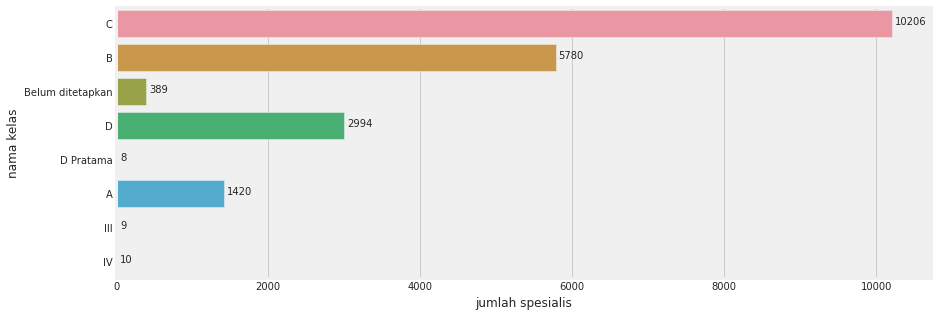

In [59]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['spesialis_dasar'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
plt.xlabel('jumlah spesialis',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

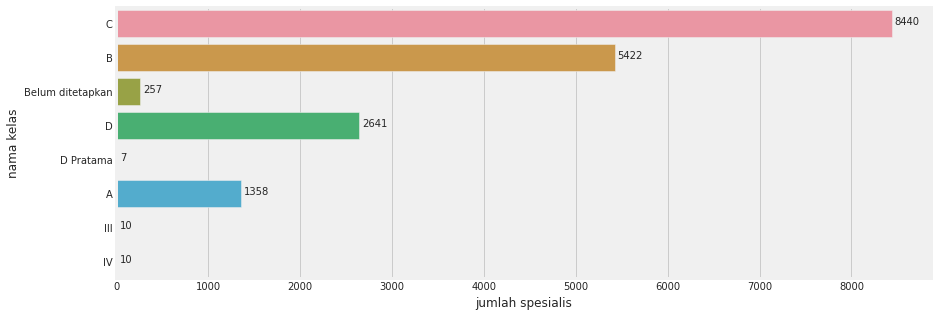

In [60]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x=fa_rs['spesialis_penunjang'],
            y='kelas',
            data=fa_rs,
            estimator=sum,
            ci = None,
            ax=ax)
for jml in ax.patches:
  ax.annotate(jml.get_width(), xy=(jml.get_width(), jml.get_y()+jml.get_height()/2),
              xytext=(3,2), textcoords='offset points', ha='left', va='center')
plt.xlabel('jumlah spesialis',fontsize=12)
plt.ylabel('nama kelas', fontsize=12)
plt.show()

##**diagram jenis rumah sakit terhadap dokter spesialis**

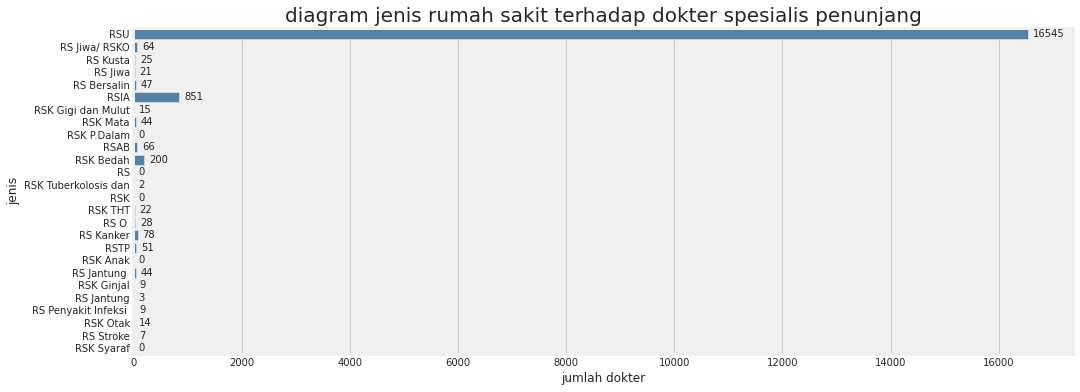

In [61]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x='spesialis_penunjang',
            y='jenis',
            data=fa_rs,
            estimator = sum,
            ci = None, color='steelblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram jenis rumah sakit terhadap dokter spesialis penunjang', fontsize=20, loc='center')
plt.xlabel('jumlah dokter', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

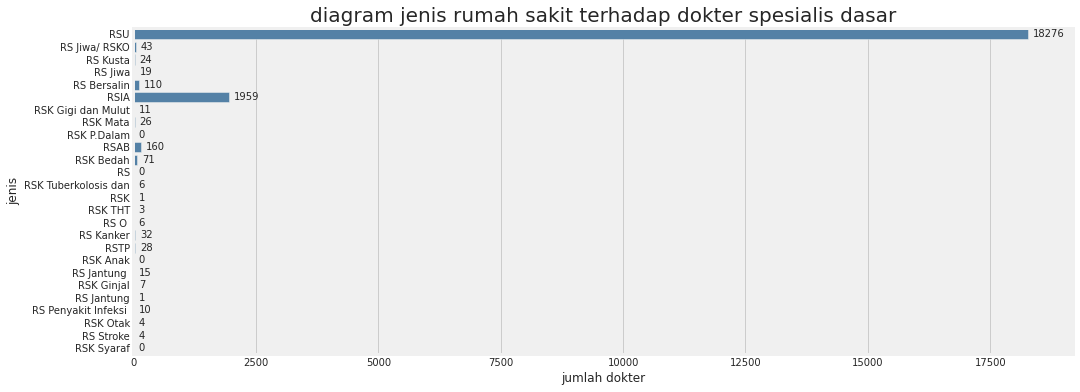

In [62]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x='spesialis_dasar',
            y='jenis',
            data=fa_rs,
            estimator = sum,
            ci = None, color='steelblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram jenis rumah sakit terhadap dokter spesialis dasar', fontsize=20, loc='center')
plt.xlabel('jumlah dokter', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

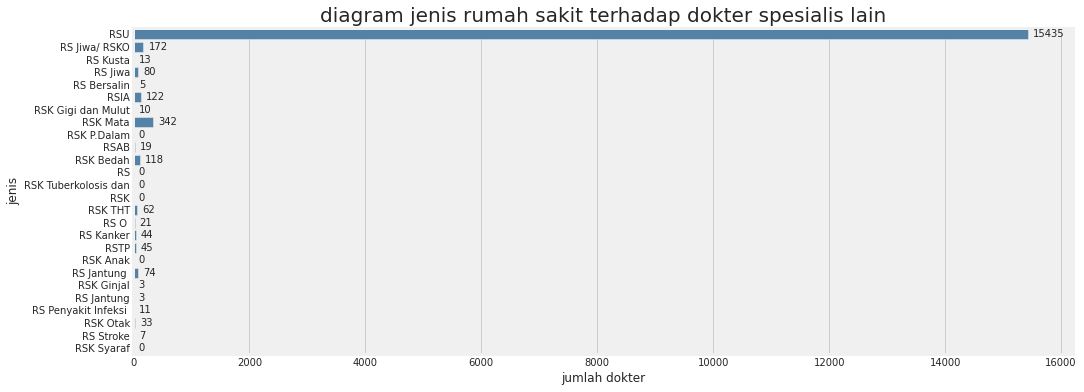

In [63]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x='spesialis_lain',
            y='jenis',
            data=fa_rs,
            estimator = sum,
            ci = None, color='steelblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram jenis rumah sakit terhadap dokter spesialis lain', fontsize=20, loc='center')
plt.xlabel('jumlah dokter', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

##**diagram nama rumah sakit terhadap dokter spesialis**

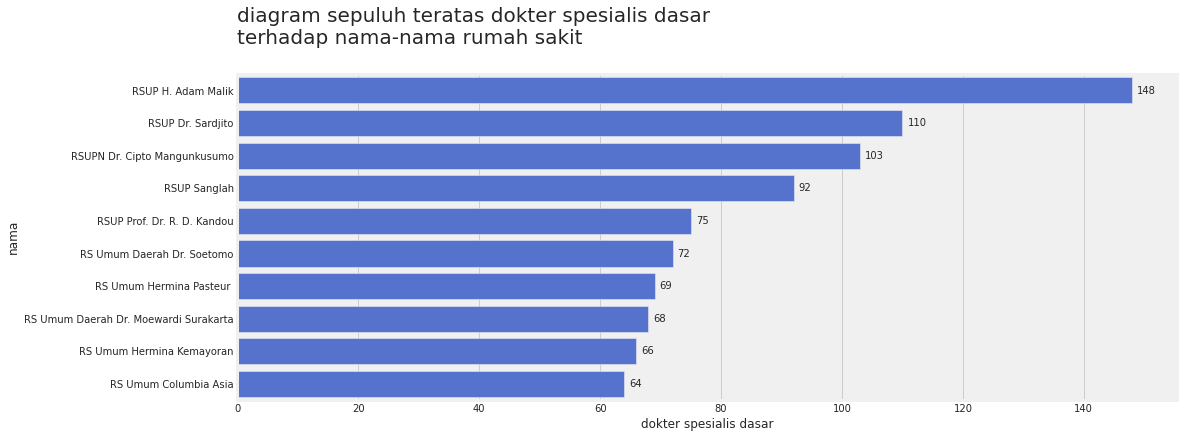

In [64]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['spesialis_dasar'], ascending=False)[:10]

sns.barplot(x='spesialis_dasar',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas dokter spesialis dasar \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('dokter spesialis dasar', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

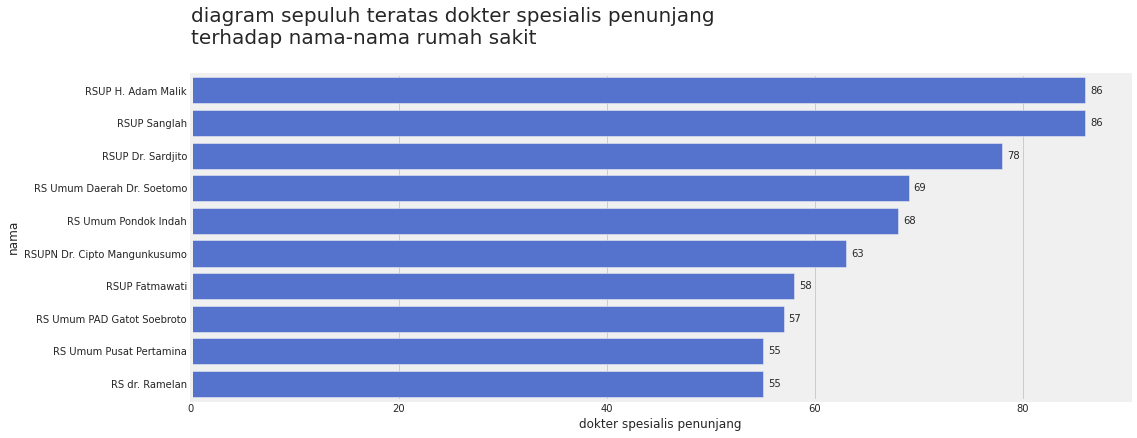

In [65]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['spesialis_penunjang'], ascending=False)[:10]

sns.barplot(x='spesialis_penunjang',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas dokter spesialis penunjang \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('dokter spesialis penunjang', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

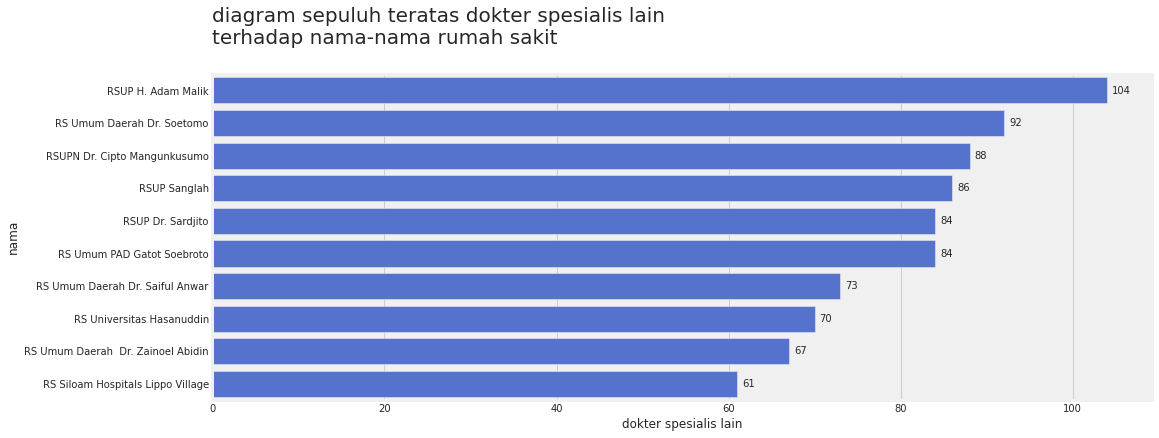

In [66]:
fig, ax = plt.subplots(figsize=(15, 6))
fa_rs1 = fa_rs.sort_values(['spesialis_lain'], ascending=False)[:10]

sns.barplot(x='spesialis_lain',
            y='nama',
            data=fa_rs1,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.title('diagram sepuluh teratas dokter spesialis lain \nterhadap nama-nama rumah sakit', fontsize=20, loc='left', pad=30)
plt.xlabel('dokter spesialis lain', fontsize=12)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()